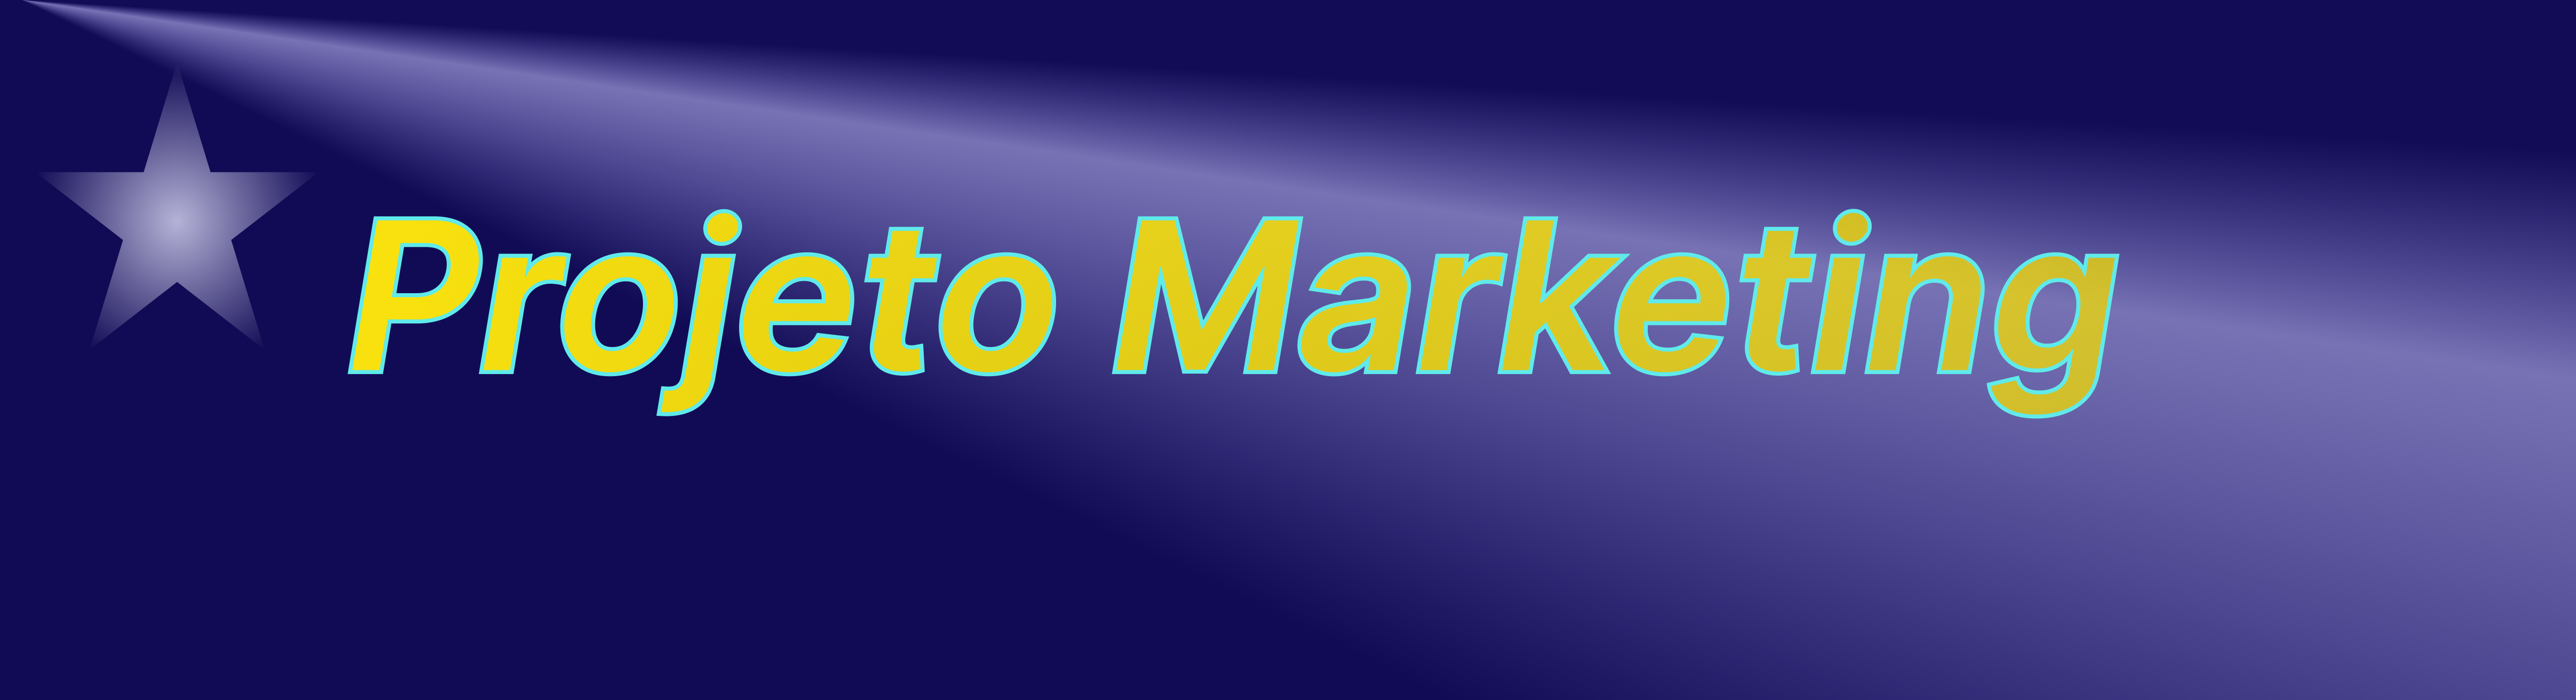

**A equipe de marketing quer realizar uma campanha promocional com intuito de premiar os clientes que trouxeram 80% do total do faturamento no ano de 2022. Para isso, a equipe precisa saber qual foi o número total destes clientes, e qual é o id (código identificador) e o nome de cada cliente a ser premiado?**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
df_vendas = pd.read_excel('BaseAulaPareto.xlsx', sheet_name='Vendas')
display(df_vendas)

,nfe,vendedor_id,cliente_id,valor_desconto,item_quantidade,valor_unitario,produto_id,data
0,SO43693,5,195,11.7902,1,167,79,2020-03-08
1,SO43895,5,595,11.0387,1,167,79,2020-03-17
2,SO44100,5,530,11.6399,1,167,79,2020-03-27
3,SO44283,5,165,8.7675,1,167,79,2020-04-04
4,SO84484,5,701,15.9819,1,167,79,2022-07-13
...,...,...,...,...,...,...,...,...
54678,SO117675,5,671,14.0175,3,75,91,2022-11-02
54679,SO117675,5,671,14.0175,3,75,91,2022-11-02
54680,SO117675,5,671,14.0175,3,75,91,2022-11-02
54681,SO117675,5,671,14.0175,3,75,91,2022-11-02


In [3]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54683 entries, 0 to 54682
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   nfe              54683 non-null  object        
 1   vendedor_id      54683 non-null  int64         
 2   cliente_id       54683 non-null  int64         
 3   valor_desconto   54683 non-null  float64       
 4   item_quantidade  54683 non-null  int64         
 5   valor_unitario   54683 non-null  int64         
 6   produto_id       54683 non-null  int64         
 7   data             54683 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 3.3+ MB


Não é necessário fazer nenhum tratamento na tabela, as informações foram carredas conforme seus respectivos tipos.

In [4]:
# filtrando os dados referentes a 2022
df_vendas= df_vendas[df_vendas['data'].dt.year==2022]

In [5]:
print('O período da análise é de', df_vendas['data'].dt.date.min(), ' até ', df_vendas['data'].dt.date.max())

O período da análise é de 2022-01-02  até  2022-11-04


In [6]:
# calculando o faturamento líquido
df_vendas['faturamento'] = df_vendas['valor_unitario']*df_vendas['item_quantidade'] - df_vendas['valor_desconto']

In [7]:
# criando a tabela de Pareto a partir do faturamento por cliente em ordem decrescente
tab_pareto = df_vendas.groupby(['cliente_id'])['faturamento'].sum().sort_values(ascending= False).reset_index()

In [8]:
# calculando o faturamento acumulado
tab_pareto['faturamento_acumulado'] = tab_pareto['faturamento'].cumsum() 

In [9]:
# obtendo o percentual de pareto 
tab_pareto['%pareto']= (tab_pareto['faturamento_acumulado']/tab_pareto['faturamento'].sum())*100

In [10]:
display(tab_pareto)

,cliente_id,faturamento,faturamento_acumulado,%pareto
0,105,30875.6706,3.087567e+04,1.180443
1,551,20320.4783,5.119615e+04,1.957339
2,671,19847.4428,7.104359e+04,2.716149
3,207,19602.9010,9.064649e+04,3.465610
4,603,18619.2531,1.092657e+05,4.177465
...,...,...,...,...
541,175,87.1008,2.615321e+06,99.989363
542,8,84.1004,2.615405e+06,99.992579
543,367,77.0532,2.615483e+06,99.995524
544,574,60.1060,2.615543e+06,99.997822


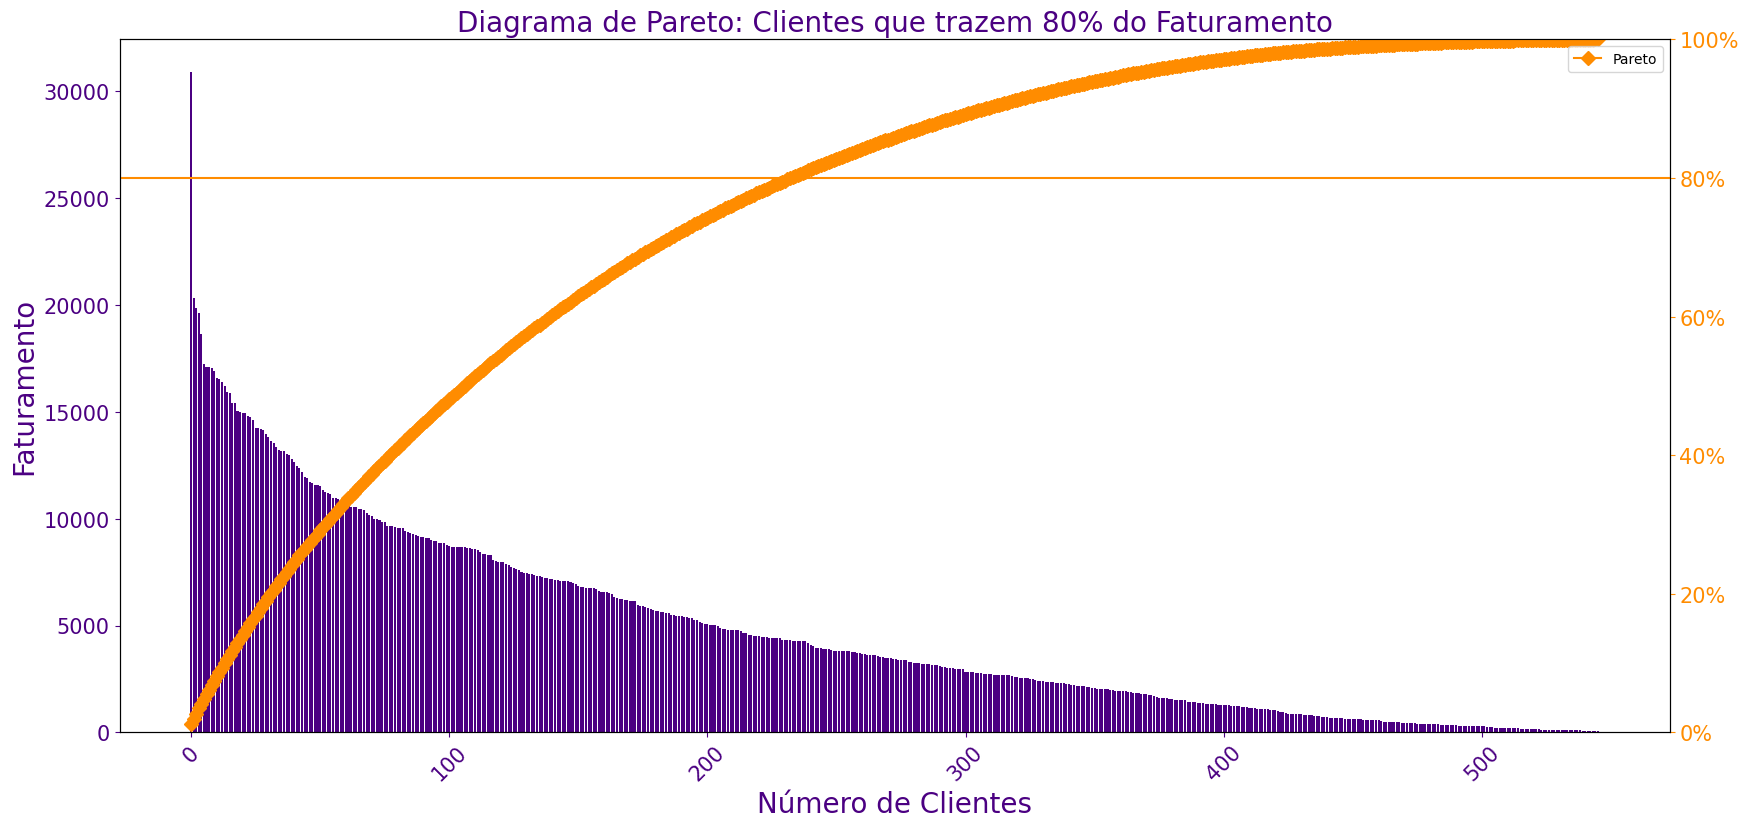

In [11]:
# construção do diagrama de Pareto

fig, ax = plt.subplots(figsize=(20, 9))

# gráfico de colunas
ax.bar(tab_pareto.index, tab_pareto['faturamento'], color='indigo')
ax.set_title("Diagrama de Pareto: Clientes que trazem 80% do Faturamento", fontsize= 20, color='indigo')
ax.set_ylabel('Faturamento', color='indigo', fontsize= 20)
ax.set_xlabel('Número de Clientes', color='indigo', fontsize= 20)

# adicionando a curva 
ax0 = ax.twinx()
ax0.plot(tab_pareto.index, tab_pareto['%pareto'], color='darkorange', marker='D', ms=7, label='Pareto')
ax0.yaxis.set_major_formatter(PercentFormatter())

# personalizando os vértices
ax.tick_params(axis='y', colors= 'indigo', labelsize=15)
ax.tick_params(axis='x', colors= 'indigo', labelsize=15)
ax0.tick_params(axis='y', colors= 'darkorange', labelsize=15)
ax0.set_ylim([0,100])

# ajuste da curva
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# adicionando a linha de 80%
plt.axhline(y=80, color='darkorange', linestyle='solid')

plt.legend()
plt.show()

No diagrama pode-se ver que pouco mais de 200 clientes trazem 80% do faturamento total do período analisado.

In [12]:
# carregando as informações, que foram pedidas, referente aos clientes
df_clientes= pd.read_excel('BaseAulaPareto.xlsx', sheet_name='Cliente', usecols='A,B')

In [13]:
display(df_clientes)

,id,descricao
0,14,Bosco Inc
1,15,"Mills, Bosco and Rath"
2,19,Haley Group
3,26,"Jones, Kuhic and Osinski"
4,33,"Davis, Turcotte and Romaguera"
...,...,...
696,694,"Padberg, Kautzer and Reinger"
697,695,"Dooley, Olson and Jacobs"
698,698,"Bayer, Carroll and McKenzie"
699,699,Gislason Inc


In [14]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         701 non-null    int64 
 1   descricao  701 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


Não é necessário fazer nenhum tratamento na tabela, as informações foram carredas conforme seus respectivos tipos.

In [15]:
# mesclando as informações dos clientes com a tabela de Pareto
tab_pareto= pd.merge(tab_pareto, df_clientes, how='inner', left_on='cliente_id', right_on='id')

In [16]:
tab_pareto

,cliente_id,faturamento,faturamento_acumulado,%pareto,id,descricao
0,105,30875.6706,3.087567e+04,1.180443,105,Klocko-Marquardt
1,551,20320.4783,5.119615e+04,1.957339,551,Davis-Stark
2,671,19847.4428,7.104359e+04,2.716149,671,DuBuque-Cormier
3,207,19602.9010,9.064649e+04,3.465610,207,Parker LLC
4,603,18619.2531,1.092657e+05,4.177465,603,"Terry, Schmeler and Konopelski"
...,...,...,...,...,...,...
541,175,87.1008,2.615321e+06,99.989363,175,Bode-Bradtke
542,8,84.1004,2.615405e+06,99.992579,8,Kris-Metz
543,367,77.0532,2.615483e+06,99.995524,367,"Heller, Carroll and Bode"
544,574,60.1060,2.615543e+06,99.997822,574,"Price, Kautzer and Heller"


In [17]:
# filtrando os clientes premiados
clientes_premiados = tab_pareto[tab_pareto['%pareto']<= 80.0]
display(clientes_premiados)

,cliente_id,faturamento,faturamento_acumulado,%pareto,id,descricao
0,105,30875.6706,3.087567e+04,1.180443,105,Klocko-Marquardt
1,551,20320.4783,5.119615e+04,1.957339,551,Davis-Stark
2,671,19847.4428,7.104359e+04,2.716149,671,DuBuque-Cormier
3,207,19602.9010,9.064649e+04,3.465610,207,Parker LLC
4,603,18619.2531,1.092657e+05,4.177465,603,"Terry, Schmeler and Konopelski"
...,...,...,...,...,...,...
228,560,4413.9151,2.074307e+06,79.305230,560,"Schuppe, Lindgren and Johnston"
229,512,4325.1816,2.078632e+06,79.470591,512,Runte-Koss
230,277,4323.5220,2.082956e+06,79.635889,277,"Bernhard, Becker and Mills"
231,646,4322.6829,2.087279e+06,79.801154,646,"Connelly, Denesik and Veum"


In [18]:
# deletando as informações que não foram pedidas dos dados que serão entregues 
clientes_premiados = clientes_premiados.drop(['faturamento','faturamento_acumulado', '%pareto', 'id'], axis=1)

# tabela a ser entregue para a equipe de marketing
display(clientes_premiados)

,cliente_id,descricao
0,105,Klocko-Marquardt
1,551,Davis-Stark
2,671,DuBuque-Cormier
3,207,Parker LLC
4,603,"Terry, Schmeler and Konopelski"
...,...,...
228,560,"Schuppe, Lindgren and Johnston"
229,512,Runte-Koss
230,277,"Bernhard, Becker and Mills"
231,646,"Connelly, Denesik and Veum"


In [19]:
# total de clientes premiados
clientes_premiados.shape[0]

233

Dos 545 clientes, o total de 233 irão ganhar o premio.

In [20]:
# verificando a porporção de clientes que causaram 80% do faturamento
round((clientes_premiados.shape[0]/tab_pareto.shape[0])*100, 2)

42.67

Neste caso, o percentual dos clientes os quais trouxeram 80% do faturamento, não foi 20%, mas sim 42.67%. 